In [31]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
# Load the stock dataS
data = pd.read_csv('tesla.csv')

#### Preprocessing of Data

In [7]:
# Normalize the data
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [14]:
# Split the data into training and testing sets
train_size = int(np.ceil(len(data_normalized) * 0.95))
train_data = data_normalized[0:int(train_size),:]

In [15]:
#Create sequence of data for LSTM

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Build the LSTM model

In [20]:
#Create
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [21]:
#Compile
model.compile(optimizer='adam', loss='mean_squared_error')

#### Train the model

In [33]:
model.fit(x_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
91/91 [==============================] - 4s 45ms/step - loss: 0.0129
Epoch 2/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0097
Epoch 3/10
91/91 [==============================] - 4s 45ms/step - loss: 0.0084
Epoch 4/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0081
Epoch 5/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0083
Epoch 6/10
91/91 [==============================] - 4s 45ms/step - loss: 0.0069
Epoch 7/10
91/91 [==============================] - 4s 45ms/step - loss: 0.0068
Epoch 8/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0072
Epoch 9/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0063
Epoch 10/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0053


In [34]:
#Create the test dataset
test_data = data_normalized[train_size - 60:, :]

In [35]:
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
# Generate predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 31ms/step


#### Visualize Predictions

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11724\3337064139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


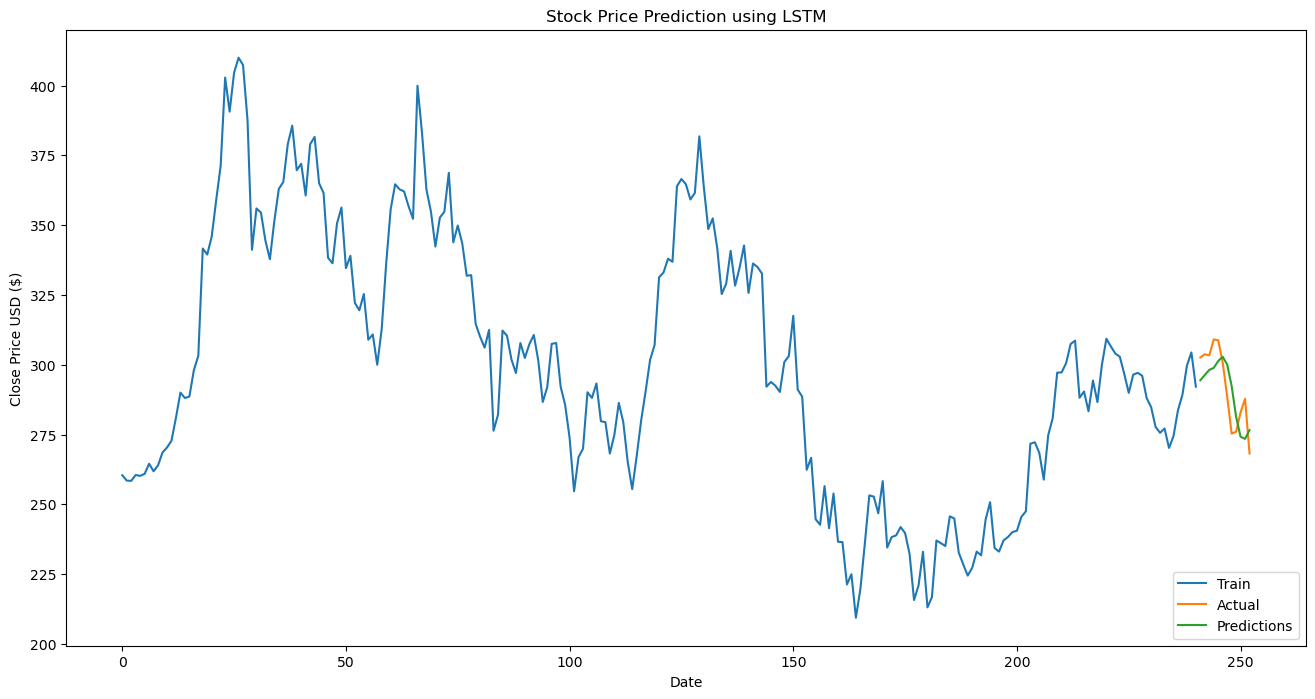

In [37]:
train =data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()